In [4]:
import torch
from torch import nn
from torch import optim
import torchvision
from torchvision import transforms, models

import requests
import zipfile
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
from tempfile import TemporaryDirectory
import random

In [5]:
source = r"https://download.pytorch.org/tutorial/hymenoptera_data.zip"
img_dir = Path("hymenoptera_data")

if img_dir.is_dir():
    print("data already exist")
    pass
else:
    print("downloading data")
#     img_dir.mkdir()
    with open("hymenoptera_data.zip", "wb") as f:
        response = requests.get(source)
        f.write(response.content)

        with zipfile.ZipFile("hymenoptera_data.zip", "r") as f:
            f.extractall(os.getcwd())
            
            os.remove("hymenoptera_data.zip")

data already exist


In [6]:
##manual transforms
normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

data_transforms = {
    "train" : transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    "val" : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])
}


In [7]:
model = models.ResNet18_Weights.DEFAULT
auto_transform = model.transforms()
auto_transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [8]:
# using auto transform for torchvision 0.15 and later
data_transforms = {
    "train" : auto_transform,
    "val" : auto_transform
}


In [9]:
datasets = {x: torchvision.datasets.ImageFolder(img_dir/x, data_transforms[x]) for x in ["train", "val"]}
for img, label in datasets["val"]:
    print(img.shape)
    break
    

torch.Size([3, 224, 224])


In [10]:
dataloader = {x: torch.utils.data.DataLoader(datasets[x], batch_size=4, shuffle=True) for x in ["train", "val"]}
dataloader['train']  

In [11]:
dataset_sizes = {x : len(datasets[x]) for x in ["train", "val"]}
dataset_sizes

{'train': 244, 'val': 153}

In [12]:
datasets["train"].classes

['ants', 'bees']

In [13]:
class_names = datasets["train"].classes
class_names

['ants', 'bees']

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [15]:
%pprint

Pretty printing has been turned OFF


In [16]:
# import random

# img_path_list = list(img_dir.glob("*/*/*"))
# class_names = [x.parent.stem for x in img_path_list]
# # print(class_names)
# random_img_path = random.choices(img_path_list, k=3)
# random_img_path
# # img_class = random_img_path.parent.stem
# # img_class

In [17]:
simple_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(1028),
    transforms.Grayscale(),
    transforms.ToTensor()
])

In [18]:
# from PIL import Image


# random_imgs = random.sample(img_path_list, k=4)
# for img in random_imgs:
#     with Image.open(img) as f:
#         fig, ax = plt.subplots(1,2, figsize=(10,7))
#         ax[0].imshow(f)
#         ax[0].set_title(f"size: {f.size}")
#         ax[0].axis(False)
#         plt.imshow(f)
        
#         trans_img = simple_transform(f).permute(1,2,0)
#         ax[1].imshow(trans_img)
#         ax[1].set_title(f"size: {trans_img.shape}")
#         ax[1].axis(False)
        
#         fig.suptitle(f"class: {img.parent.stem}")
        



In [19]:
# classes = list(set(class_names))
# classes

In [20]:
# random_sample_idx = random.sample(range(len(datasets["val"])), k=4)
# random_sample_idx                                  

# plt.figure(figsize=(15,7))
# for i, sample in enumerate(random_sample_idx):
#     img, label = datasets["val"][sample]
#     img = img.numpy().transpose((1,2,0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
#     img = std*img+mean
#     img = np.clip(img, 0, 1)

#     plt.subplot(2, 2, i+1)
#     plt.imshow(img)
#     plt.title(f"class: {classes[label]}, \nsize: {img.shape}")
#     plt.axis(False)

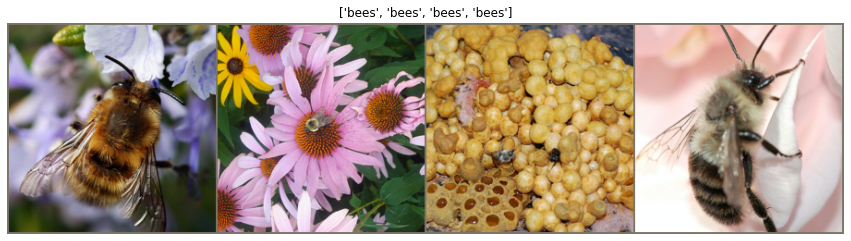

In [21]:
def img_show(img, title=None):
    img = img.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std*img + mean
    img = np.clip(img, 0, 1)
    plt.figure(figsize=(15,10))
    if title is not None:
        plt.title(title)
    plt.axis(False)
    plt.imshow(img)

img , label = next(iter(dataloader["train"]))
out = torchvision.utils.make_grid(img)
title = [class_names[i] for i in label]
img_show(out, title)

In [22]:
img , label = next(iter(dataloader["train"]))
out = torchvision.utils.make_grid(img)
print(img.numpy().shape, out.numpy().shape)
label

(4, 3, 224, 224) (3, 228, 906)


tensor([1, 1, 0, 1])

In [23]:
def timer(func):
    import time
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        
        result = func(*args,**kwargs)
        
        total_time = time.perf_counter() - start
        
        print(f"it took {total_time//60} minutes and {total_time%60:.0f} seconds")
        return result
    return wrapper

In [24]:
@timer
def test_func():
    print(f"\t{'-'*10}")
    
test_func()

	----------
it took 0.0 minutes and 0 seconds


In [25]:
a = torch.randint(1,10, (5,2,3))
print(a)
real, pred = torch.max(a, dim=1)
real

tensor([[[6, 9, 6],
         [1, 7, 5]],

        [[4, 5, 6],
         [5, 1, 2]],

        [[1, 1, 1],
         [4, 5, 1]],

        [[2, 6, 1],
         [9, 6, 3]],

        [[4, 3, 4],
         [3, 4, 1]]])


tensor([[6, 9, 6],
        [5, 5, 6],
        [4, 5, 1],
        [9, 6, 3],
        [4, 4, 4]])

In [26]:
len(dataloader["train"])

61

In [27]:
model_save_path = Path("best_model")
model_save_path/'best_model_params.pth'

WindowsPath('best_model/best_model_params.pth')

In [28]:
@timer
def train_model(model, criterion, optimizer, scheduler, epochs=4):
    
    with TemporaryDirectory() as temp_dir:
#     model_save_path = Path("best_model")
#     model_save_path.mkdir(parents=True,exist_ok=True)
        best_model_param_path = os.path.join(temp_dir, 'best_model_params.pth')
        torch.save(model.state_dict(), best_model_param_path)
        best_acc = 0.0

        for epoch in range(epochs):
            print(f"epoch: {epoch}/{epochs}...\n({'-'*10})")

            for phase in ["train", 'val']:

                if phase == "train":
                    model.train()
                else:
                    model.eval()

                running_loss = 0
                running_acc = 0

                for img, label in dataloader[phase]:
                    img = img.to(device)
                    label = label.to(device)
        

                    with torch.set_grad_enabled(phase == "train"):
                        logits = model(img)
                        pred_probs = torch.softmax(logits, dim=1)
                        preds = torch.argmax(pred_probs, dim=1)
    #                     _, preds = torch.max(pred_probs, dim=1)

                        loss = criterion(logits, label)
                        running_loss += loss.item()
                        acc = torch.eq(preds, label).sum().item() / len(preds)
                        running_acc += acc

                        if phase == "train":
                            optimizer.zero_grad()
                            loss.backward()
                            optimizer.step()

                if phase == "train":
                    scheduler.step()

                running_loss /= len(dataloader[phase])
                running_acc /= len(dataloader[phase])

                print(f"{phase} loss: {running_loss}, acc: {running_acc}")

                if phase == "val" and running_acc > best_acc:
                    best_acc = running_acc
                    torch.save(model.state_dict(), best_model_param_path)
        print(f"best val acc: {best_acc:.4f}")            
        model.load_state_dict(torch.load(best_model_param_path))
    
    return model
    


In [29]:
img, label = next(iter(dataloader["val"]))
label

tensor([1, 0, 0, 1])

In [30]:
datasets["val"][22][0].shape

torch.Size([3, 224, 224])

In [47]:
def visualize_model(model):
    import random
    
    random_sample_idx = random.sample(range(len(datasets["val"])), k=9)
    
    model.eval()
    plt.figure(figsize=(15,10))
    
    for i, sample in enumerate(random_sample_idx):
        with torch.inference_mode():
            img, label = datasets["val"][sample]
            img = img.to(device)
            label = torch.tensor(label)
            label = label.to(device)

            out = model(img.unsqueeze(0))
            pred_probs = torch.softmax(out, dim=1)
            preds = torch.argmax(pred_probs, dim=1)

        plt.subplot(3,3, i+1)

        if preds == label:
            plt.title(f"truth : {class_names[label]} | pred: {class_names[preds]} | probability: {pred_probs.max():0.3f}", c="g", fontsize=10)

        else:
            plt.title(f"truth : {class_names[label]} | pred: {class_names[preds]} | probability: {pred_probs.max():0.3f}", c="g", fontsize=10)
        
        plt.axis(False)
        img = img.cpu().permute(1,2,0)
        mean = torch.tensor([0.485, 0.456, 0.406])
        std = torch.tensor([0.229, 0.224, 0.225])
        img = std*img + mean
        
        ##same as np.clip()
        img = torch.clamp(img, min=0, max=1)
        
        plt.imshow(img)

In [32]:
weights = models.ResNet18_Weights.DEFAULT
weights

ResNet18_Weights.IMAGENET1K_V1

In [33]:
auto_transform = weights.transforms()
auto_transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [34]:
model = models.resnet18(weights=weights).to(device)
model;

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

In [36]:
total_params = 0
for name, param in model.named_parameters():
    num_params = int(torch.prod(torch.tensor(param.shape)))
    total_params += num_params
    print(f"param name:{name} | param_shape:{param.shape} | num_params: {num_params}")
total_params    

param name:conv1.weight | param_shape:torch.Size([64, 3, 7, 7]) | num_params: 9408
param name:bn1.weight | param_shape:torch.Size([64]) | num_params: 64
param name:bn1.bias | param_shape:torch.Size([64]) | num_params: 64
param name:layer1.0.conv1.weight | param_shape:torch.Size([64, 64, 3, 3]) | num_params: 36864
param name:layer1.0.bn1.weight | param_shape:torch.Size([64]) | num_params: 64
param name:layer1.0.bn1.bias | param_shape:torch.Size([64]) | num_params: 64
param name:layer1.0.conv2.weight | param_shape:torch.Size([64, 64, 3, 3]) | num_params: 36864
param name:layer1.0.bn2.weight | param_shape:torch.Size([64]) | num_params: 64
param name:layer1.0.bn2.bias | param_shape:torch.Size([64]) | num_params: 64
param name:layer1.1.conv1.weight | param_shape:torch.Size([64, 64, 3, 3]) | num_params: 36864
param name:layer1.1.bn1.weight | param_shape:torch.Size([64]) | num_params: 64
param name:layer1.1.bn1.bias | param_shape:torch.Size([64]) | num_params: 64
param name:layer1.1.conv2.wei

11689512

In [37]:
from torchinfo import summary

summary(model,
       input_size=(4,3,224,224),
       col_names=["input_size",'output_size','num_params','trainable'],
       col_width=17,
       row_settings=['var_names']
       );

In [38]:
for name, param in model.named_parameters():
#     if "fc" not in name:
        param.requires_grad = False

In [39]:
model.fc.in_features

512

In [40]:
model.fc = nn.Linear(512, 2)
model = model.to(device)

In [41]:
summary(model,
       input_size=(4,3,224,224),
       col_names=["input_size",'output_size','num_params','trainable'],
       col_width=17,
       row_settings=['var_names']
       );

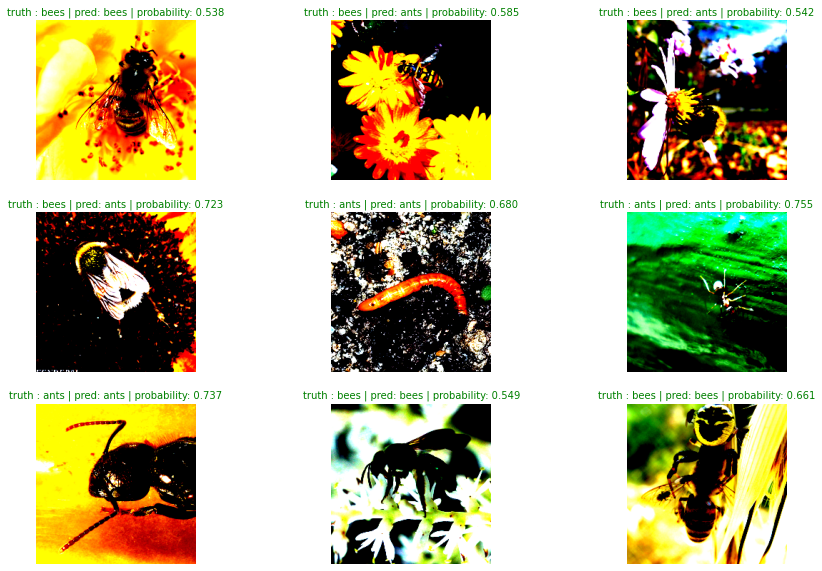

In [42]:
visualize_model(model)

In [43]:
ft_model = train_model(model,
       criterion,
           optimizer,
           scheduler)
ft_model;

epoch: 0/4...
(----------)
train loss: 0.7574299187933813, acc: 0.5
val loss: 0.7856005430221558, acc: 0.48717948717948717
epoch: 1/4...
(----------)
train loss: 0.7606972797972257, acc: 0.48360655737704916
val loss: 0.7984548753652817, acc: 0.48717948717948717
epoch: 2/4...
(----------)
train loss: 0.7597066872432584, acc: 0.5040983606557377
val loss: 0.8148271280985612, acc: 0.46794871794871795
epoch: 3/4...
(----------)
train loss: 0.743684425705769, acc: 0.5040983606557377
val loss: 0.8224776601180052, acc: 0.47435897435897434
best val acc: 0.4872
it took 0.0 minutes and 26 seconds


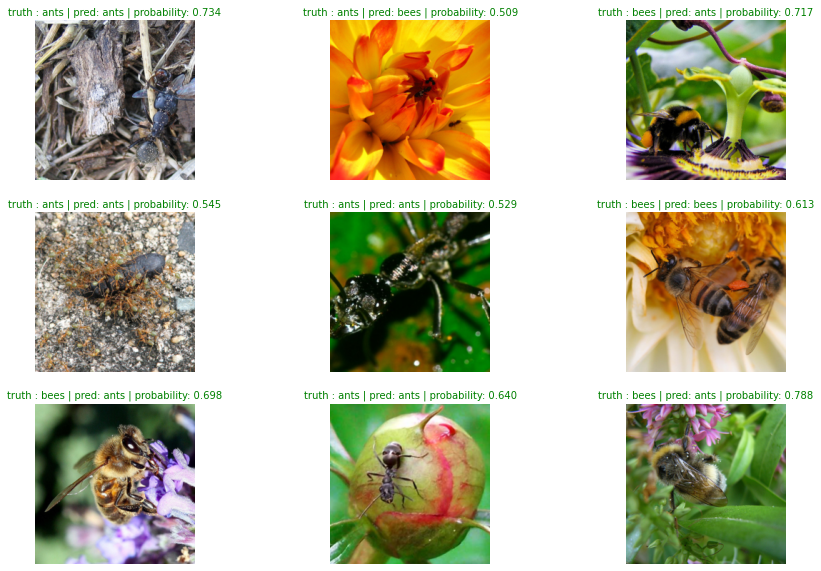

In [50]:
visualize_model(ft_model)

In [63]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

truth_labels = [y for x, y in dataloader["val"]]
truth_labels = torch.cat(truth_labels)
truth_labels

tensor([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1])

In [72]:
model.eval()
with torch.inference_mode():
    pred_labels = []
    for inp, label in dataloader["val"]:
        inp, label = inp.to(device), label.to(device)
        logits = model(inp)
        preds = torch.argmax(torch.softmax(logits, dim=1), dim=1)
        pred_labels.append(preds.cpu())  
    
        
pred_labels = torch.cat(pred_labels)
pred_labels

tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1])

In [73]:
class_names

['ants', 'bees']

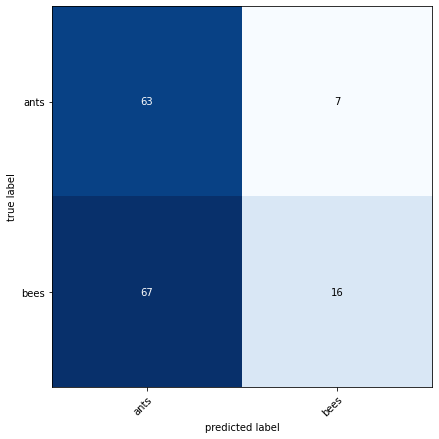

In [76]:
confmat = ConfusionMatrix(task="binary", num_classes=len(class_names))
confmat_tensor = confmat(preds=pred_labels,
                        target=truth_labels)

fig, ax = plot_confusion_matrix(confmat_tensor.numpy(),
                               class_names=class_names,
                               figsize=(15,7))